# Análise de dados do SINASC 2019 de Rondônia

## 1 Preparação dos dados

### 1.1 Carregando a base de dados e importando *packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [2]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

### 1.2 Tratamento de dados ausentes

In [3]:
#Verficando os missing em cada coluna de interesse
sinasc.loc[:, ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']].isna().sum()

APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [4]:
#Removendo linhas com valores ausentes para as colunas APGAR5 e SEXO
sinasc.dropna(subset = ['APGAR5', 'SEXO'], inplace = True)
#Substituindo valores NaN na coluna GESTACAO
sinasc['GESTACAO'].fillna('Ignorado', inplace = True)
#Convertendo valores de APGAR5 para tipo inteiro
sinasc['APGAR5'] = sinasc['APGAR5'].astype('int')
#Contagem de missings após tratamento dos dados ausentes
sinasc[['APGAR5','SEXO', 'GESTACAO', 'PESO']].isna().sum()

APGAR5      0
SEXO        0
GESTACAO    0
PESO        0
dtype: int64

In [5]:
#Contagem dos valores para cada um das categoria da varíavel GESTACAO
sinasc['GESTACAO'].value_counts()

37 a 41 semanas        22520
32 a 36 semanas         2233
Ignorado                1216
42 semanas e mais        698
28 a 31 semanas          162
22 a 27 semanas           85
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

In [6]:
#Reatribuindo valores da coluna EStado civil da mãe 
sinasc.loc[sinasc['ESTCIVMAE'] == 1, 'ESTCIVMAE'] = 'Solteira'
sinasc.loc[sinasc['ESTCIVMAE'] == 2, 'ESTCIVMAE'] = 'Casada'
sinasc.loc[sinasc['ESTCIVMAE'] == 3, 'ESTCIVMAE'] = 'Viúva'
sinasc.loc[sinasc['ESTCIVMAE'] == 4, 'ESTCIVMAE'] = 'Separado judicialmente'
sinasc.loc[sinasc['ESTCIVMAE'] == 5, 'ESTCIVMAE'] = 'União consensual'
sinasc.loc[sinasc['ESTCIVMAE'] == 9, 'ESTCIVMAE'] = 'Ignorado'
#Preenchindo os missings com o valor 'Ignorado'
sinasc['ESTCIVMAE'].fillna('Ignorado', inplace = True)
#Cotagem dos valores de cada categoria estado civil
sinasc['ESTCIVMAE'].value_counts().sort_values()

Viúva                       57
Separado judicialmente     451
Ignorado                   459
União consensual          7145
Solteira                  8905
Casada                    9904
Name: ESTCIVMAE, dtype: int64

In [7]:
#Substituindo valores da varíavel consulta
sinasc.loc[sinasc['CONSULTAS'] == 1, 'CONSULTAS'] = 'Nenhuma'
sinasc.loc[sinasc['CONSULTAS'] == 2, 'CONSULTAS'] = 'De 2 a 3'
sinasc.loc[sinasc['CONSULTAS'] == 3, 'CONSULTAS'] = 'De 4 a 6'
sinasc.loc[sinasc['CONSULTAS'] == 4, 'CONSULTAS'] = '7 ou mais'
sinasc.loc[sinasc['CONSULTAS'] == 9, 'CONSULTAS'] = 'Ignorado'
#Contagem dos valores
sinasc['CONSULTAS'].value_counts()

7 ou mais    18583
De 4 a 6      5957
De 2 a 3      1359
Nenhuma        972
Ignorado        50
Name: CONSULTAS, dtype: int64

## 2 Entendimento dos Dados

### 2.1 Frequências das variáveis qualitativas

In [8]:
def countplot_grid(nrows: int, ncols: int, cols: list, data: pd.DataFrame, palettes: list,
                   figsize = (12,8), wspace = 0.4, hspace = 0.7):
    with mpl.style.context('seaborn-whitegrid'):
        fig = plt.figure(figsize = figsize)
        plt.subplots_adjust(wspace = wspace, hspace = hspace)
        for i, (col, palette) in enumerate(zip(cols, palettes)):
            ax = fig.add_subplot(nrows, ncols, i+1)
            if(col == 'SEXO'):
                sns.countplot(ax = ax, y = col, data = data, palette = palette)
            else:
                sns.countplot(ax = ax, 
                              x = col, 
                              data = data,
                              order = data[col].value_counts().sort_values().index,
                              palette = palette)
            ax.tick_params(axis = 'x', rotation = 30)
            ax.set_title(f'Frquência da variável: {col}', fontweight = 'bold')

#### 2.1.1 Variáveis referentes ao bebê e a gestação

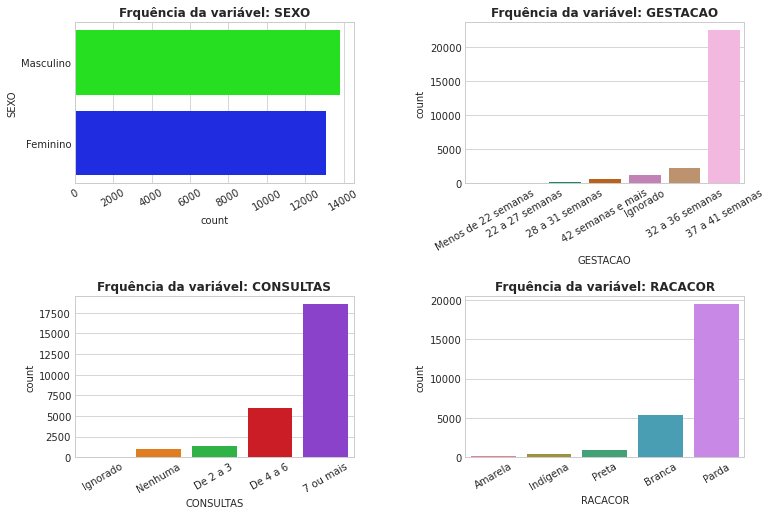

In [9]:
cols = ['SEXO', 'GESTACAO', 'CONSULTAS', 'RACACOR']
pcolors = ['hsv', 'colorblind', 'bright', 'husl']

countplot_grid(nrows = 2,ncols = 2, cols = cols, data = sinasc, palettes = pcolors)

#### 2.1.2 Variáveis referentes a mãe

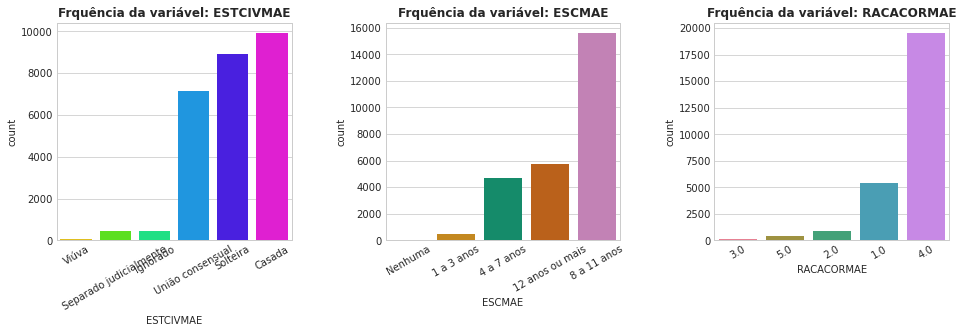

In [10]:
cols = ['ESTCIVMAE', 'ESCMAE', 'RACACORMAE']
pcolors = ['hsv', 'colorblind', 'husl']

countplot_grid(nrows = 1,ncols = 3, cols = cols, data = sinasc, palettes = pcolors, figsize = (16, 4))

### 2.2 Distribuição das variáveis quantitativas

#### 2.2.1 Variáveis *target*

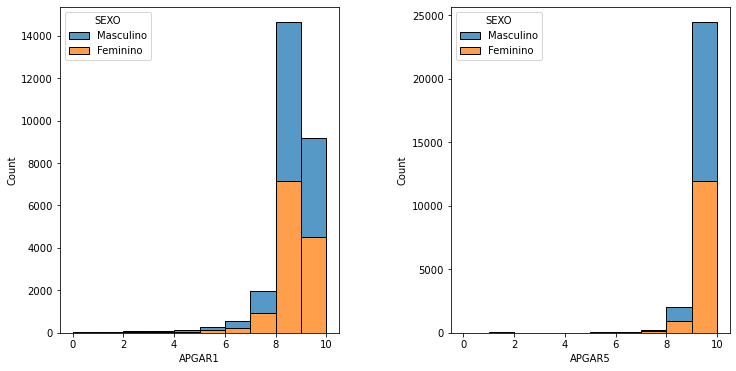

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
sns.histplot(ax = axs[0], data = sinasc, x = 'APGAR1',hue = 'SEXO',bins = 10, multiple = 'stack')
sns.histplot(ax = axs[1], data = sinasc, x = 'APGAR5',hue = 'SEXO',bins = 10, multiple = 'stack')
plt.subplots_adjust(wspace = 0.4)

In [12]:
print(f'APGAR1 >= 8: {np.mean(sinasc.APGAR1 >= 8):.4f}')
print(f'APGAR5 >= 8: {np.mean(sinasc.APGAR5 >= 8):.4f}')

APGAR1 >= 8: 0.8837
APGAR5 >= 8: 0.9829


Mais de 98% dos dados de `APGAR5` se encontra na faixa de 8 a 10, faixa considerada **normal**.

#### 2.2.2 Boxplots

In [13]:
def boxplot_grid(nrows: int, ncols: int, cols: list, data: pd.DataFrame, color = 'Blue',
                figsize = (12,8), wspace = 0.4, hspace = 0.2):
    fig,axes = plt.subplots(nrows, ncols, figsize = figsize)
    axs = fig.get_axes()
    for i, col in enumerate(cols):
        sns.boxplot(ax = axs[i],
                    y = col,
                    data = data,
                    saturation = 1,
                    width = 0.4,
                    linewidth = 1,
                    fliersize = 2.5);
    fig.delaxes(axs[len(cols)])
    plt.subplots_adjust(wspace = wspace, hspace = hspace)

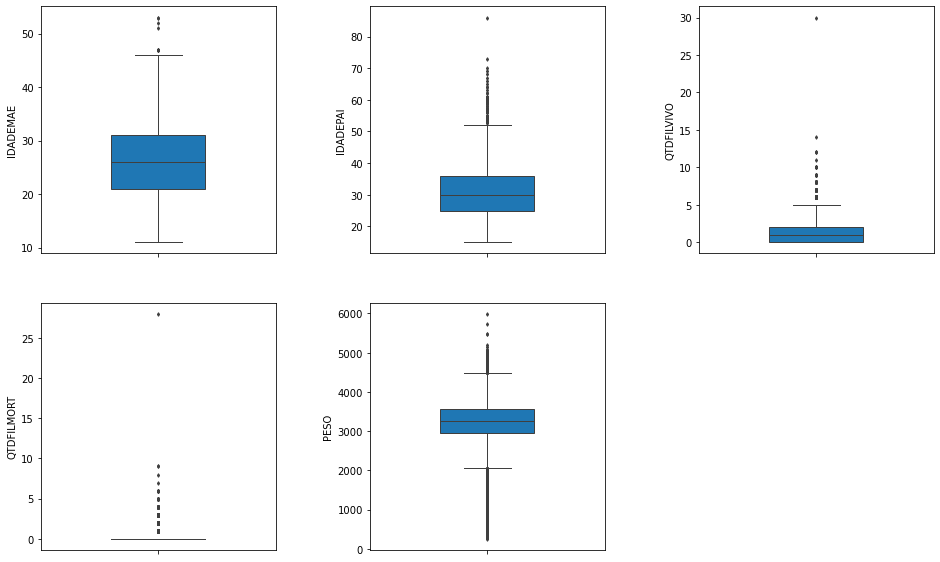

In [14]:
vars_quant = ['IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'QTDFILMORT', 'PESO']

boxplot_grid(nrows = 2,ncols = 3, cols = vars_quant, data = sinasc, figsize = (16, 10))

#### 2.2.3 histograma da idade da mãe e do peso do bebê

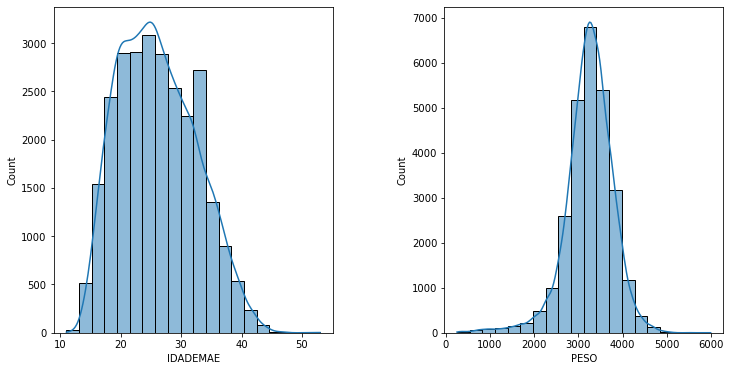

In [15]:
cols = ['IDADEMAE', 'PESO']
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs = fig.get_axes()
for ax, col in zip(axs, cols):
    sns.histplot(ax = ax,
                data = sinasc,
                alpha = 0.5,
                x = col,
                bins = 20,
                kde = True);
plt.subplots_adjust(wspace = 0.4)

## 3 Relação entre as variáveis `APGAR5` e `APGAR1` e as demais

### 3.1 Sexo do bebê

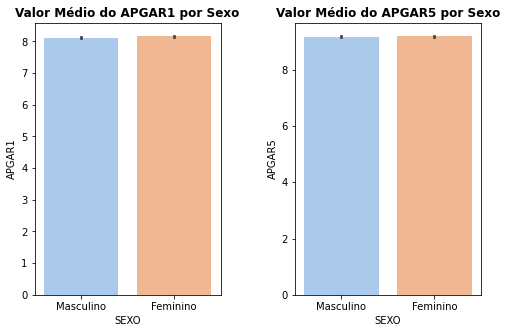

In [16]:
#Plotagem do valor médio do APGAR1 e APGAR5 por sexo 
with mpl.rc_context({'figure.subplot.wspace': 0.4}):
    plt.close('all')
    fig, ax = plt.subplots(1, 2, figsize = (8, 5))
    cols = ['APGAR1', 'APGAR5']
    for ax, col in zip(fig.get_axes(), cols):
        sns.barplot(ax = ax, x = 'SEXO', y = col, data = sinasc, palette = 'pastel')
        #Criando títulos
        ax.set_title(f"Valor Médio do {col} por Sexo", fontweight = 'bold')

### 3.2 Semanas de gestação

#### 3.2.1 APGAR5 e APGAR1 por tempo de Gestação

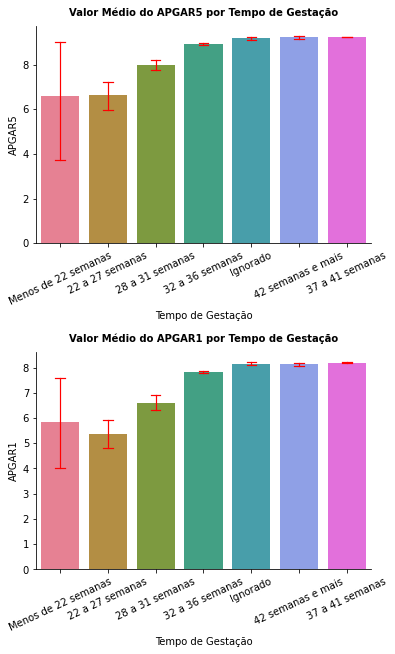

In [17]:
nomes_grupo = sinasc.groupby('GESTACAO')['APGAR5'].mean().sort_values().index

with mpl.rc_context({'axes.spines.right': False, 'axes.spines.top': False, 'figure.subplot.hspace': 0.5}):
    plt.close('all')
    fig, ax = plt.subplots(2, 1, figsize = (6, 10))
    #Ordenando as barras pelo valor médio do APGAR
    for ax, col in zip(fig.get_axes(), ['APGAR5', 'APGAR1']):
        sns.barplot(ax = ax, 
                    x = 'GESTACAO', 
                    y = col, 
                    data = sinasc,
                    order = nomes_grupo, 
                    palette = 'husl',
                    errcolor = 'r', 
                    errwidth = 1.2, 
                    capsize = 0.2)

        #Nomeando rótulo no eixo x
        ax.set_xlabel('Tempo de Gestação', fontsize = 10)
        #Rotacionando os ticks no eixo x
        ax.tick_params(axis = 'x', rotation = 25)
        #Colocando o título
        ax.set_title(f'Valor Médio do {col} por Tempo de Gestação', fontsize = 10, fontweight = 'bold', y = 1.02)

#### 3.2.2 APGAR1 e APGAR5 médio por tempo de Gestação de acordo com o sexo

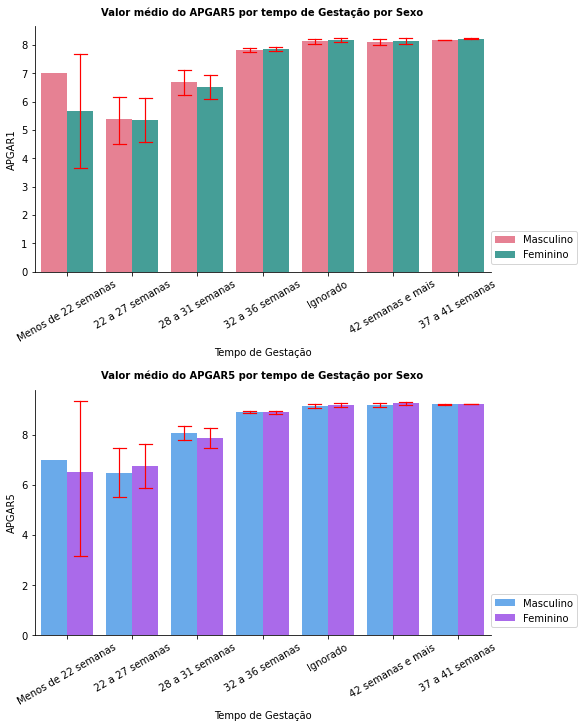

In [18]:
cols = ['APGAR1', 'APGAR5']
palette_colors = ['husl', 'cool']
with mpl.rc_context({'axes.spines.top': False, 'axes.spines.right': False, 'figure.constrained_layout.use': True}):
    fig, ax = plt.subplots(2, 1, figsize = (8, 10))
    for ax, col, palette_color in zip(fig.get_axes(), cols, palette_colors):
        sns.barplot(ax = ax, 
                    x = 'GESTACAO', 
                    y = col, 
                    hue = 'SEXO',
                    data = sinasc,
                    order = nomes_grupo,
                    palette = palette_color,
                    errcolor = 'r',
                    errwidth = 1.2,
                    capsize = 0.2)

        #Rotação dos ticks no eixo x
        ax.tick_params(axis = 'x', rotation = 30)
        #Eixo x
        ax.set_xlabel('Tempo de Gestação', fontsize = 10)
        #Título
        ax.set_title('Valor médio do APGAR5 por tempo de Gestação por Sexo', fontsize = 10, fontweight = 'bold', y = 1.02)
        #Legendas
        ax.legend(loc='right', bbox_to_anchor = (1.2, 0.1))

#### 3.2.3 Distribuição dos valores de APGAR5 para categorias de gestação

In [19]:
#Tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas.
categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', 
                '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais',
              'Ignorado']
freq_percentual = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'], normalize = 'index') \
                    .reindex(categorias)
freq_percentual

APGAR5,0,1,2,3,4,5,6,7,8,9,10
GESTACAO,,,,,,,,,,,
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000896,0.000896,0.000448,0.000896,0.003583,0.004926,0.007613,0.025078,0.162114,0.585311,0.208240
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000933,0.001954,0.006705,0.062922,0.602309,0.323401
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Ignorado,0.000822,0.001645,0.001645,0.000822,0.001645,0.004112,0.005757,0.005757,0.070724,0.578947,0.328125


In [20]:
#Verificando se os percentuais de cada somam 1 (100%)
freq_percentual.sum(axis = 1)

GESTACAO
Menos de 22 semanas    1.0
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Ignorado               1.0
dtype: float64

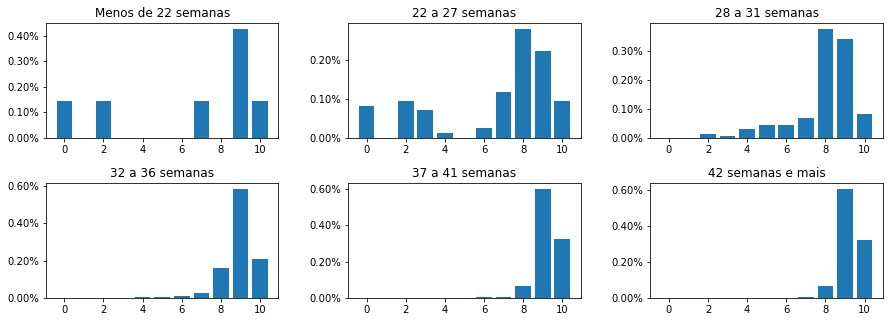

In [21]:
#Gráficos-Distribuição percentual dos valores de APGAR5 para categorias de gestação

from matplotlib import ticker

valores_APGAR5 = freq_percentual.columns
categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', 
                '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']
with mpl.rc_context({'figure.subplot.wspace': 0.3, 'figure.subplot.hspace': 0.4}):
    #plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    fig = plt.figure(figsize = (15, 8))

    for i, categoria in enumerate(categorias):
        ax = fig.add_subplot(3, 3, i+1)
        ax.bar(valores_APGAR5, freq_percentual.loc[categoria])
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals = 2))
        ax.set_title(f'{categoria}')


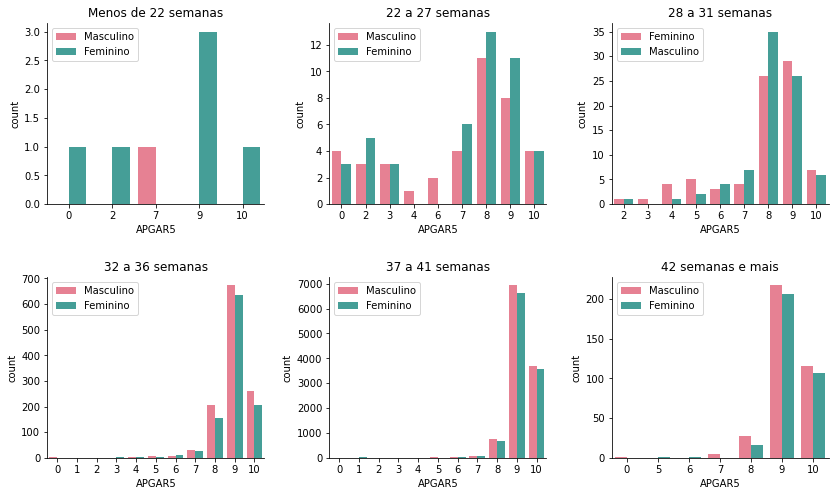

In [22]:
#Gráficos-Distribuição de APGAR5 por sexo para categorias de gestação
categorias = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', 
                '32 a 36 semanas', '37 a 41 semanas', '42 semanas e mais']

with mpl.rc_context({'axes.spines.top': False, 'axes.spines.right': False}):
    fig, axs = plt.subplots(2, 3, figsize = (14, 8))
    #Ajuste dos gráficos
    plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    
    axes = fig.get_axes()
    for ax, categoria in zip(axes, categorias):
        sns.countplot(ax = ax, 
                      x = 'APGAR5', 
                      hue = 'SEXO', 
                      data = sinasc[sinasc['GESTACAO'] == categoria], 
                      palette = 'husl')
        ax.set_title(f'{categoria}')
        ax.legend(loc = 'upper left')

**Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faremos um gráfico de barras da tabela cruzada acima, a fim de concluir se este conjunto de dados corrobora ou não com a afirmação dos médicos.**

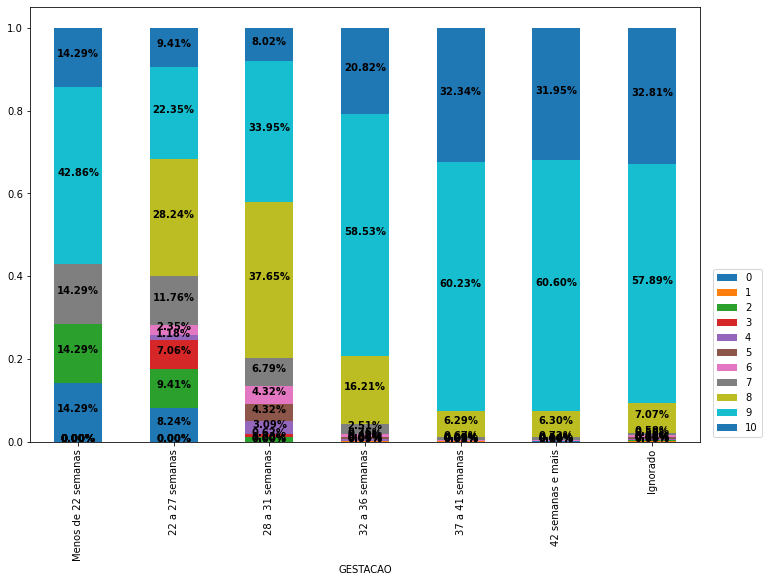

In [23]:
#Plotagem do gráfico de barras empilhadas
g = freq_percentual.plot(kind = 'bar', stacked = True, figsize = (12, 8))

for bar in g.patches:
    prop = bar.get_height()
    plt.text(x = bar.get_x() + bar.get_width()/2,
             y = bar.get_y() + bar.get_height()/2,
             s = f'{prop:.2%}',
             fontweight = 'bold',
             ha = 'center')
    
plt.legend(loc = 'lower right', bbox_to_anchor = (1.1, 0));

Percebe-se que para tempos de gestação acima de 32 semanas, há uma maior concentração de valores de APGAR5 entre 8 e 10, faixa de valores consideradas normais. No entanto, é possível obervar uma concentração significativa (acima de 50%) em torno desse valores para grupos com menos de 32 semanas. O que se observa é um maior espalhamento dos valores de APGAR5 para outras faixas de valores não considerados normais. Contudo, o fato de crianças terem nascidas antes de 37 semanas de gestação não é suficiente para afirmar que serão prematuras.

### 3.3 Estado civil da Mãe

In [24]:
APGAR5_med_ESTCIVMAE = sinasc.groupby('ESTCIVMAE')['APGAR5'].mean()
APGAR5_med_ESTCIVMAE

ESTCIVMAE
Casada                    9.217387
Ignorado                  9.187364
Separado judicialmente    9.141907
Solteira                  9.113307
União consensual          9.211197
Viúva                     9.210526
Name: APGAR5, dtype: float64

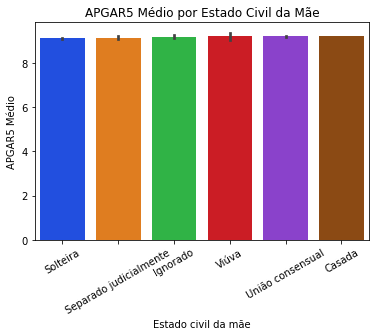

In [25]:
#Plotagem do APGAR5 médio por Estado civil da mãe, usando barplot
fig, ax = plt.subplots(figsize = (6, 4))
sns.barplot(ax = ax, 
            x='ESTCIVMAE', 
            y = 'APGAR5', 
            data = sinasc,
            order = APGAR5_med_ESTCIVMAE.sort_values().index, 
            palette = 'bright')
#Rotação dos ticks no eixo x
ax.tick_params(axis = 'x', rotation = 30)
#Adicionando rótulos aos eixos e um título
ax.set(xlabel = 'Estado civil da mãe', ylabel = 'APGAR5 Médio', title = 'APGAR5 Médio por Estado Civil da Mãe');

### 3.4 Número de consultas pré-natal

In [26]:
APGAR5_med_consultas = sinasc.groupby('CONSULTAS')['APGAR5'].mean()
APGAR5_med_consultas

CONSULTAS
7 ou mais    9.207717
De 2 a 3     9.057395
De 4 a 6     9.154440
Ignorado     8.860000
Nenhuma      8.981481
Name: APGAR5, dtype: float64

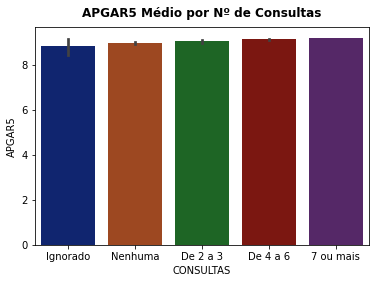

In [27]:
ax = sns.barplot(x = 'CONSULTAS', 
                 y = 'APGAR5', 
                 estimator = np.mean, 
                 data = sinasc,
                 order = APGAR5_med_consultas.sort_values().index, 
                 palette = 'dark')
ax.set_title('APGAR5 Médio por Nº de Consultas', fontsize = 12, fontweight = 'bold', y = 1.02);

### 3.5 Peso ao nascer (em gramas)

#### 3.5.1 Barplot

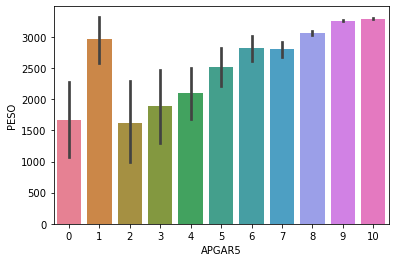

In [28]:
sns.barplot(x = 'APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'husl');

#### 3.5.2 Boxplot

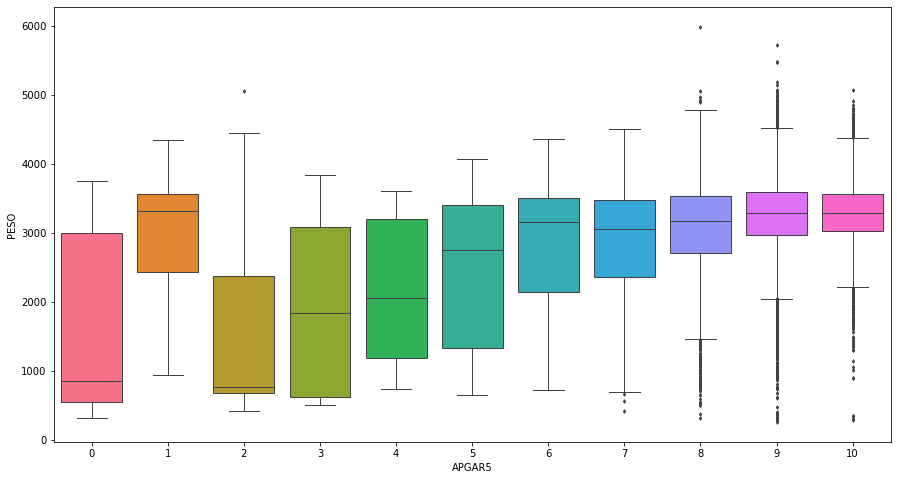

In [29]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.boxplot(ax = ax, 
            y = 'PESO', 
            x = 'APGAR5', 
            data = sinasc, 
            palette = 'husl', 
            saturation = 1, 
            linewidth = 1, 
            fliersize = 2.5);

**Categorizando a variável APGAR5:**

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [30]:
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'cat_APGAR5'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'cat_APGAR5'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'cat_APGAR5'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'cat_APGAR5'] = 'normal'

sinasc.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,cat_APGAR5
0,1,2679477.0,110001,1,19,União consensual,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,Casada,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,Ignorado,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


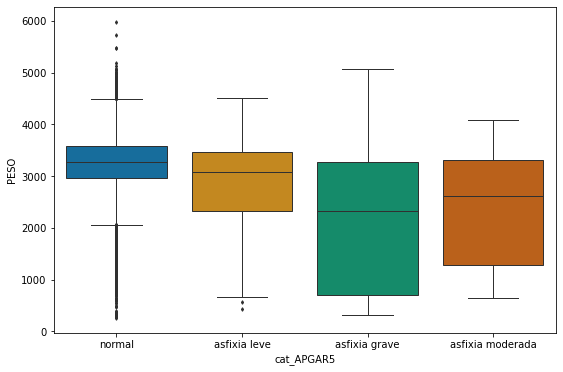

In [31]:
fig = plt.figure(figsize = (9, 6))
ax = fig.add_subplot()
sns.boxplot(ax = ax, 
            x = 'cat_APGAR5', 
            y = 'PESO', 
            data = sinasc, 
            palette = 'colorblind', 
            linewidth = 1, 
            fliersize = 2.5);

## 4 Novos *insights*

### 4.1 Número de nascimentos

Para determinar a quantidade de nascimentos em nossa base de dados, vamos considerar a quantidade de datas de nascimetos presentes na base de dados.

In [32]:
sinasc.DTNASC.isna().sum()

0

In [33]:
sinasc.DTNASC.size

26921

#### 4.1.1 Número de nascimentos de acordo com sua origem

In [34]:
sinasc[['DTNASC', 'ORIGEM']].groupby('ORIGEM').agg('count')

,DTNASC
ORIGEM,
1,26921


Todos os nascimentos ocorreram no **hospital**

#### 4.1.2 Municípios com maior e menor número de nascimentos

In [35]:
#DataFrame da contagem de nascimentos por municípios
(sinasc[['munResNome', 'DTNASC']]
 .groupby('munResNome').count()
 .sort_values(by = 'DTNASC')
 .rename_axis('Município')
 .rename(columns = {'DTNASC': 'Contagem de Nascimentos'})
)

,Contagem de Nascimentos
Município,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


O município de **Castanheiras** é o munícipio com menor número de nascimentos registrados, enquanto que **Porto Velho** é o município em que ocorreram mais nascimentos.

#### 4.1.3 Em que mês ocorreu maior número de nascimentos?

In [36]:
#Subset da base de dados completa, contendo apenas a data e hora de nascimento
#Drop missings
df = sinasc[['DTNASC', 'HORANASC']].dropna()

In [37]:
#Criando uma coluna contendo apenas os meses de nascimento
data_nasc = pd.to_datetime(df['DTNASC'])
mes_nasc = list(map(lambda data: data.month, data_nasc))
df['MESNASC'] = mes_nasc

In [38]:
(df[['DTNASC', 'MESNASC']]
 .groupby('MESNASC')
 .agg('count')
 .rename_axis('Mês')
 .rename(columns = {'DTNASC':'Número de nascimentos'})
)

,Número de nascimentos
Mês,
1,2255
2,2112
3,2445
4,2360
5,2355
6,2169
7,2145
8,2189
9,2343


In [39]:
(df[['DTNASC', 'MESNASC']]
 .groupby('MESNASC')
 .agg('count')
 .apply(lambda x: x / x.sum())
 .rename_axis('Mês')
 .rename(columns = {'DTNASC':'Número de nascimentos'})
).style.format('{:.2%}')

,Número de nascimentos
Mês,
1,8.38%
2,7.85%
3,9.09%
4,8.77%
5,8.75%
6,8.06%
7,7.97%
8,8.14%
9,8.71%


O mês de **Março** foi o mês em que houve maior número de nascidos. 

#### 4.1.4 Em que intervalo de tempo durante o dia ocorreram mais partos?

In [40]:
#Atrbuindo a uma variável valores da horário de nascimento convertidos para inteiro
hora = df['HORANASC'].astype(int).values
#Criando uma nova coluna contendo apenas a hora, sem considerar os minutos
df['HORA'] = list(map(lambda x: format(x, '04d')[0:2], hora))
display(df)

,DTNASC,HORANASC,MESNASC,HORA
0,2019-02-19,1620.0,2,16
1,2019-02-21,1830.0,2,18
2,2019-02-25,915.0,2,09
3,2019-03-20,835.0,3,08
4,2019-03-23,750.0,3,07
...,...,...,...,...
27023,2019-12-13,2030.0,12,20
27024,2019-10-04,650.0,10,06
27025,2019-08-02,1430.0,8,14
27026,2019-12-23,741.0,12,07


In [41]:
(df
 .groupby('HORA')
 .agg({'DTNASC':'count'})
 .sort_values(by ='DTNASC', ascending = False)
 .rename({'DTNASC': 'Nº de nascimentos'}, axis = 1)
)

,Nº de nascimentos
HORA,
10,2225
09,2072
11,2012
14,1641
15,1572
08,1528
17,1516
16,1515
18,1285


In [42]:
np.mean((df['HORA'] == '09') | (df['HORA'] == '10') | (df['HORA'] == '11'))

0.2345353159851301

O maior número de partos ocorreram no intervalo de 09-12 horas, correspondendo a 23.4% dos partos ocorridos em 2019

#### 4.1.5 Quais seriam as profissões das mães mais frequentes, de acordo com o número de partos realizados?

In [43]:
print(f'Missings na coluna CODOCUPMAE: {sinasc.CODOCUPMAE.isna().sum()}')
sinasc['CODOCUPMAE'].fillna(0, inplace = True)
print(f'Missings na coluna CODOCUPMAE: {sinasc.CODOCUPMAE.isna().sum()}')

Missings na coluna CODOCUPMAE: 2892
Missings na coluna CODOCUPMAE: 0


In [44]:
sinasc['CODOCUPMAE'] = sinasc['CODOCUPMAE'].astype(int)

In [45]:
df1 = (sinasc[['DTNASC', 'CODOCUPMAE']]
 .groupby('CODOCUPMAE')
 .agg('count')
 .sort_values(by = 'DTNASC', ascending = False)
 .rename_axis('Ocupação da mãe')
 .rename(columns= {'DTNASC': 'Número de nascimentos'})
 .head(10)
)
display(df1)

,Número de nascimentos
Ocupação da mãe,
999992,13554
0,2892
999991,1114
622020,910
621005,792
421125,521
354705,479
999994,408
521110,403


In [46]:
ocupacao = {'0': 'Não informado',
            '999992': 'Dona de casa', 
            '999991': 'Estudante', 
            '622020': 'Trabalhador volante da agricultura', 
            '621005':'Trabalhador agropecuário em geral', 
            '421125':'Operador de caixa', 
            '354705':'Representante comercial autônomo', 
            '999994': 'Desempregado crônico', 
            '521110': 'Vendedor do comércio varejista', 
            '622005':'Caseiro (agricultura)', 
            '411010': 'Assistente admnistrativo'}

O maior número de nascimentos foi observado para mães com ocupação de código '999992', isto é, para donas de casa. A 2ª e 3ª profissões com maior número de partos realizados foram a de estudante e trabalhadores da agricultura

#### 4.1.6 Para quais raças foram registrados maior número de partos?

In [47]:
sinasc['RACACORMAE'] = sinasc['RACACORMAE'].astype(str).map({'1.0':'Branca', '2.0':'Preta', '3.0':'Amarela', '4.0':'Parda', '5.0':'Indígena'})

In [48]:
(sinasc[['DTNASC', 'RACACORMAE']]
 .groupby('RACACORMAE')
 .agg('count')
 .rename_axis('Raça da mãe')
 .sort_values(by = 'DTNASC', ascending = False)
 .rename(columns= {'DTNASC': 'Número de nascimentos'})
)

,Número de nascimentos
Raça da mãe,
Parda,19512
Branca,5373
Preta,867
Indígena,400
Amarela,116


Mães de raça parda tiveram maior número de partos registrados.

### 4.2 Idade da mãe e do pai

#### 4.2.1 Percentual de mães e pais menores de idade

In [49]:
print(f'Número de mães menores de idade: {np.mean(sinasc.IDADEMAE < 18):.2%}')
print(f'Número de mães menores de idade: {np.mean(sinasc.IDADEPAI < 18):.2%}')

Número de mães menores de idade: 7.76%
Número de mães menores de idade: 0.21%


#### 4.2.2 Quais os municípios em que a diferença de idade entre os pais é mais significativa?

In [50]:
df2 = sinasc[['munResNome', 'IDADEPAI', 'IDADEMAE']].dropna()
df2['DIFIDADE'] = df2['IDADEPAI']-df2['IDADEMAE']
display(df2)

,munResNome,IDADEPAI,IDADEMAE,DIFIDADE
0,Alta Floresta D'Oeste,26.0,19,7.0
1,Alta Floresta D'Oeste,24.0,29,-5.0
2,Alta Floresta D'Oeste,32.0,37,-5.0
3,Alto Alegre dos Parecis,24.0,30,-6.0
4,Alta Floresta D'Oeste,27.0,30,-3.0
...,...,...,...,...
27021,Colorado do Oeste,38.0,25,13.0
27022,Vilhena,33.0,34,-1.0
27023,Vilhena,35.0,32,3.0
27025,Vilhena,30.0,24,6.0


In [51]:
(df2[['munResNome','DIFIDADE']]
 .groupby('munResNome')
 .agg('mean')
 .sort_values(by = 'DIFIDADE', ascending = False)
 .rename_axis('Município')
 .rename(columns = {'DIFIDADE': 'Diferença de idade'})
 .head(5)
)

,Diferença de idade
Município,
Itapuã do Oeste,11.125000
Monte Negro,7.035714
Vale do Anari,6.866667
Candeias do Jamari,6.210526
Buritis,6.062500


### 4.3 Quantidade de filhos vivos e mortos

In [52]:
print(f'Quantidade total de filhos vivos: {sinasc.QTDFILVIVO.sum()}')
print(f'Quantidade total de filhos mortos: {sinasc.QTDFILMORT.sum()}')

Quantidade total de filhos vivos: 26642.0
Quantidade total de filhos mortos: 6617.0


#### 4.3.1 A faixa etária da mãe e o tipo de parto influencia na taxa de filhos vivos e mortos?

In [53]:
#Definindo dos intervalos de idade
intervalos = pd.IntervalIndex.from_tuples([(10, 18), (18, 26), (26,34), (34,42),(42,50), (50, 58)])
#Segmentando os valores de idade das mães nesses intervalos
idade_mae = pd.cut(sinasc['IDADEMAE'], intervalos)

In [54]:
#Quantidade total de filhos vivos e mortos no ano de 2019 por tipo de parto e faixa etária da mãe
df3 = (sinasc
       .groupby(by = ['PARTO', idade_mae])
       .agg({'QTDFILVIVO':sum, 'QTDFILMORT': sum})
       .rename_axis(['Tipo de Parto', 'faixa etária'])
       .rename({'QTDFILVIVO': 'Qtd Filhos Vivos', 'QTDFILMORT': 'Qtd Filhos Vivos'})
       )
display(df3)

QTDFILVIVO  QTDFILMORT
Tipo de Parto faixa etária                        
Cesáreo       (10, 18]           278.0       127.0
              (18, 26]          5067.0      1401.0
              (26, 34]          7667.0      1964.0
              (34, 42]          3624.0      1105.0
              (42, 50]           148.0        41.0
              (50, 58]             2.0         1.0
Vaginal       (10, 18]           287.0       132.0
              (18, 26]          3699.0       778.0
              (26, 34]          3964.0       738.0
              (34, 42]          1810.0       309.0
              (42, 50]            53.0         4.0
              (50, 58]             0.0         0.0

In [55]:
#Percentuais de filhos nascidos vivos e mortos no ano de 2019 por tipo de parto e faixa etária da mãe
total = df3.sum(axis = 'columns').values
df3.div(total, axis = 0).style.format('{:.2%}')

De modo geral, partos vaginais tem maior chance de sucesso que partos cesáreos. Desconsiderando os valores para a faixa de (50, 58], devido a insuficiência de dados, observa-se uma maior taxa de sucesso para partos cesáreos para mães com intervalo de idade (26, 34] e intervalo (34,42] e (42, 50] para parto vaginal. Para mães na faixa de idade (42,50], a chance de sucesso é 15% maior para parto vaginal. 

#### 4.3.2 Qual a relação entre a raça e a Qtds de filhos vivos e mortos?

In [56]:
(sinasc
 .groupby('RACACOR')
 .agg({'QTDFILVIVO':[('Total', 'sum'), ('Média', 'mean')],
       'QTDFILMORT':[('Total', 'sum'), ('Média', 'mean')]})
 .rename_axis('Raça').rename(columns = {'QTDFILVIVO': 'Qtd de Filhos vivos', 
                                        'QTDFILMORT': 'Qtd de Filhos mortos'})
)

Qtd de Filhos vivos           Qtd de Filhos mortos          
                       Total     Média                Total     Média
Raça                                                                 
Amarela                 96.0  0.880734                 28.0  0.259259
Branca                4428.0  0.865689               1244.0  0.248353
Indígena               743.0  1.890585                 92.0  0.235897
Parda                19825.0  1.082092               4874.0  0.271774
Preta                  935.0  1.126506                238.0  0.292025

Registrou-se um maior número de filhos nascidos vivos e mortos no ano de 2019 para as raças pardas e brancas. No entanto, a raça branca tem a média mais baixa de filhos vivos, mas também uma das menores para filhos mortos. A raça preta, por outro lado, é a que possue maior média de filhos mortos e uma das maiores para filhos vivos. A maior média de filhos vivos e a menor média para filhos mortos ocorrem para a raça indígena.

In [57]:
#Percentual de filhos vivos e mortos por raça
df4 = sinasc.groupby('RACACOR').agg({'QTDFILVIVO': 'sum', 'QTDFILMORT': 'sum'})
total = df4.sum(axis = 1)
df4.div(total, axis = 0).style.format('{:.2%}')

,QTDFILVIVO,QTDFILMORT
RACACOR,,
Amarela,77.42%,22.58%
Branca,78.07%,21.93%
Indígena,88.98%,11.02%
Parda,80.27%,19.73%
Preta,79.71%,20.29%


Analisando em termos percentuais, a raça indígena possui maior percentual de sobrevivência e a raça amarela, a menor.

---